<a href="https://colab.research.google.com/github/aneeshcheriank/approaching-any-machine-learning-problem/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Metrics
- diff types of evaluation metrics
## Classification
  - Accurcy
  - Precision
  - Recall
  - F1 Score
  - Area Under ROC (Reciver Operating Characterestic)
  - Log loss
  - precision at K (P@k)
  - Average precision at K (AP@k)
  - Mean average precision at k (MAP@k)
## Regression
  - Mean Absolute Error
  - Mean Squared Error
  - Root Mean Squared Error
  - Root Mean Squared Logarithamic Error
  - Mean Percentage Error
  - Mean Absolute Percentage Error
  - R<sup>2</sup>
- user created evaluation metrics
- when to use which metrics
  - depends on the target variable

- let think we have a binary classification problem
- images of chest x-ray we have to predict does the image is a collapsed lung (pneumothrax)
- we have 100 images of non-pneumotrax images and 100 images of pneumotrax images
- <b>when we have equal positive and negative sets we use Accuracy, preciesion, recall, and f1</b>

## Accurcay

In [ ]:
def accuracy(y_true, y_pred):
  '''
  Function to calculate accuracy
  y_ture: list of true values
  y_pred: list of predicted values
  return: accuracy score
  '''

  correct_counter = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct_counter += 1

  reutn correct_counter/len(y_true)

 ## Problems
 - sked data
  - 90% of data belongs to one category

## Precision
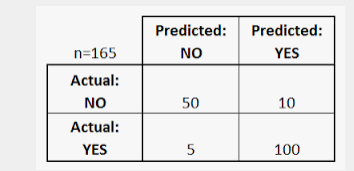

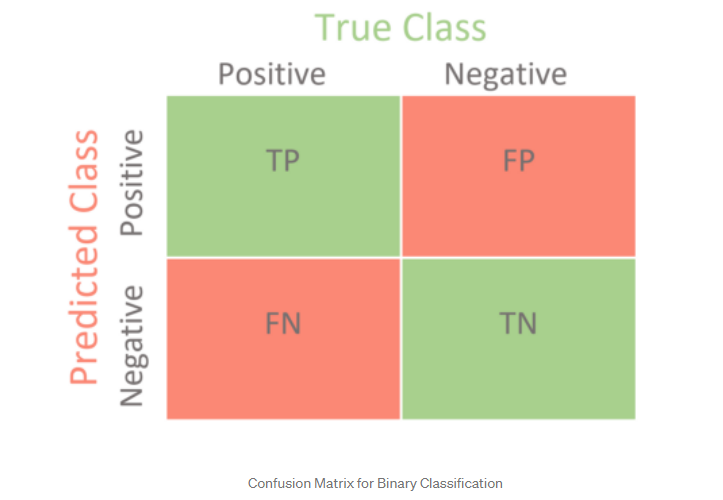

- accurcy = (tp + tn) / (tp+fp+tn+fn)
  - (100+50)/(100+10+50+5)
- precision = tp / (tp+fp)
  - 100/(100+10)
  - out of the prdicted positive how many are correct
- recall = tp/(tp+fn)
  - True Positive Rate
  - 100/(100+5)
  - out of the correct positive how many are predicted
- False Positive Rate
  - Out of Negative class how many predicted Positive

- most of the models predict a probability
- it chooses a threshold 0.5
- not always ideal, depending on the threshold the precision and recall can change drastically


In [ ]:
y_true = [
    0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 1, 0 
]

y_pred = [
    0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,
    0.15952202, 0.03819563, 0.11639273, 0.079377, 0.08584789, 0.39095342,
    0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905,
    0.61977213, 0.33056815
]

precisions = []
recalls = []

thresholds =  [
    0.0490937 , 0.05934905, 0.079377, 0.08584789, 0.11114267, 0.11639273,
    0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.33056815,
    0.39095342, 0.61977213
]

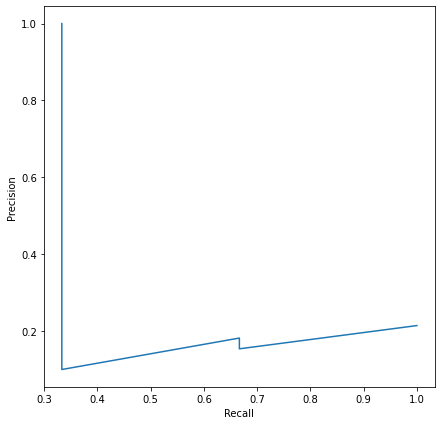

In [ ]:
def confusion_metrics(y_true, y_pred):

  tp = 0
  tn = 0
  fp = 0
  fn = 0

  for y_t, y_p in zip(y_true, y_pred):
    
    if y_p == 1: # 
      if y_t == y_p:
        tp += 1
      else:
        fp += 1

    if y_p == 0:
      if y_t == y_p:
        tn += 1
      else:
        fn += 1

  return (tp, tn, fp, fn)

def precision(y_true, y_pred):
  tp, tn, fp, fn = confusion_metrics(y_true, y_pred)
  return tp /(tp + fp)

def recall(y_true, y_pred):
  tp, tn, fp, fn = confusion_metrics(y_true, y_pred)
  return tp /(tp + fn)


for i in thresholds:
  temp_prediction = [1 if x>= i else 0 for x in y_pred]

  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)

  precisions.append(p)
  recalls.append(r)


import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision');

- challenge to choose the value of threshold
  - low: 
    - more postive values
    - less false positive
    - high precision
    - low recall
  - high:
    - less false negative
    - low precision
    - high recall

## F1 Score
- F1 = 2PR/(P+R)

- TPR (True positive rate)
- sensitivity (also called)
  - TPR = TP / (TP+FN)

- FPR (False Positive Rate)
  - FPR = FP/(TN+FP)
  - 1 - FPR is the true negative rate

- TPR and FPR are important

In [ ]:
y_true = [
    0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1      
]

y_pred = [
    0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 
    0.66, 0.3, 0.2, 0.85, 0.15, 0.99        
]

from sklearn import metrics

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

- AUC between 0 and 1
  - AUC = 1, perfect model
    - most of the time made mistake with validation

  - AUC = 0
    - bad model
    - invert the prob, you have the perfect model, you may have the inverted class

  - AUC = 0.5
    - mode is perfect random


- What is AUC?
  - Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax
from chest x-ray images. This means that if you select a random image from your
dataset with pneumothorax (positive sample) and another random image without
pneumothorax (negative sample), then the pneumothorax image will rank higher
than a non-pneumothorax image with a probability of 0.85.

## log loss
log loss = -1 * (target * log(prediction) + (1-target) * log(1-prediction))

In [1]:
import numpy as np
def log_loss(y_true, y_prob):
  loss = []
  epsilon = 1e-15
  for yt, yp in zip(y_true, y_prob):
    yp = np.clip(yp, epsilon, 1-epsilon)

    temp_loss = -1.0 * (
        yt * np.log(yp) + (1-yt) * np.log(1-yp)
    )
    loss.append(temp_loss)

  return np.mean(loss)

# Multi Class prediction
## macro precision
- calculate precision for all the class and average them
## micro precision
- calcualate class wise true positive and false positive and then used that to calculate the overall precision
## weighted precision
- same as macro however the weights are depends on the number of items in each class


- FP: Type 1 Error
- FN: Type 2 Error

Text(0.5, 48.5, 'Predicted Labels')

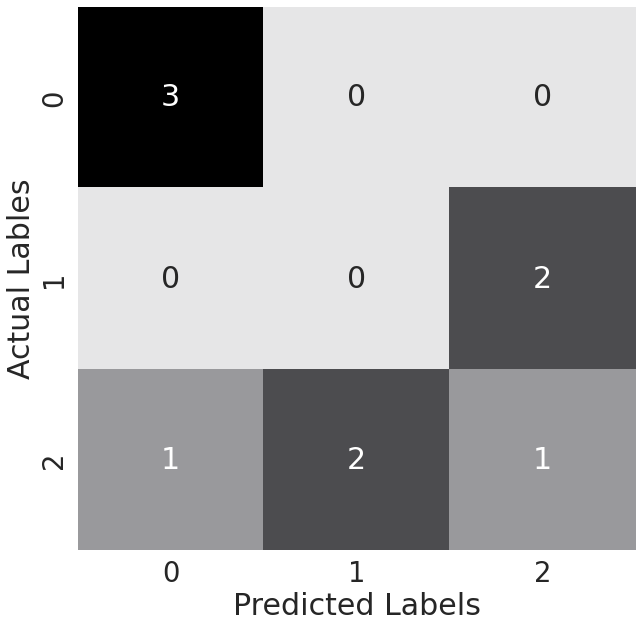

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Lables')
plt.xlabel('Predicted Labels')

# Multi-Label Classification